In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
 df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace= True)

In [5]:
df.rename(columns={'v1':'target',
                  'v2':'text'}, inplace= True)

In [9]:
#Labeling
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
# 1== 'spam', 0== 'not spam'

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
#removing duplicates
df=df.drop_duplicates(keep='first')

# Explotary data anyalysis

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [14]:
import nltk # natural launguage tool kit

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
df['num_characters']=df['text'].apply(len)

C:\Users\mayan\AppData\Local\Temp\ipykernel_24460\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [17]:
# num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\mayan\AppData\Local\Temp\ipykernel_24460\2144046247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\mayan\AppData\Local\Temp\ipykernel_24460\2144046247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [18]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
#spam
df[df['target']== 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [20]:
#not spam
df[df['target']== 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [21]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

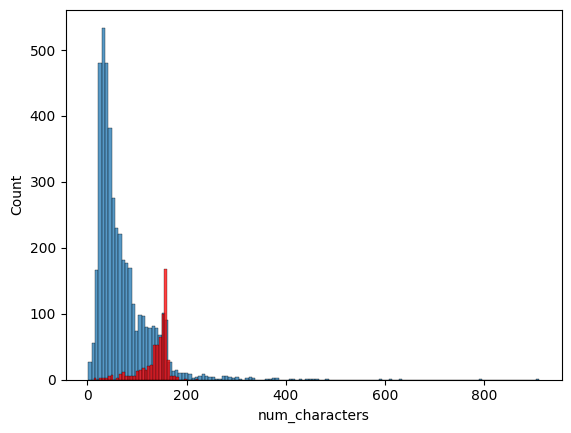

In [22]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color= 'red')

# Data pre processing

In [23]:
from nltk.corpus import stopwords

In [24]:
import string

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
#changing the tense
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer() 


In [27]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [28]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\mayan\AppData\Local\Temp\ipykernel_24460\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [29]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [30]:
#gettnig the most used words [word cloud]

from wordcloud import WordCloud
wc= WordCloud(width= 500, height= 500, min_font_size=10, background_color='white')

In [31]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

NameError: name 'plt' is not defined

In [ ]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)) 

# Naive baised Model (Best  for textual data)

In [91]:
# Bag of Words(Vertorization)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

cv= CountVectorizer()
svc= SVC(kernel='sigmoid', gamma=1.0)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
tifdf= TfidfVectorizer(max_features= 3000)

In [80]:
X= tifdf.fit_transform(df['transformed_text']).toarray()

In [81]:
Y= df['target'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [85]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [86]:
gnb.fit(X_train, Y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [92]:
svc.fit(X_train, Y_train)
y_pred1= svc.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.9758220502901354
[[893   3]
 [ 22 116]]
0.9747899159663865


In [88]:
bnb.fit(X_train, Y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## SOME EXTRA MODELS

In [93]:


mnb.fit(X_train, Y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [94]:
etc.fit(X_train, Y_train)
y_pred2= etc.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9748549323017408
[[893   3]
 [ 23 115]]
0.9745762711864406


In [95]:
rfc.fit(X_train, Y_train)
y_pred2= rfc.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9738878143133463
[[894   2]
 [ 25 113]]
0.9826086956521739


In [68]:
# we selected tfidf with mnb

# Model IMprove

In [101]:
# Voting Classifire
from sklearn.ensemble import VotingClassifier

voting= VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')


In [106]:
voting.fit(X_train, Y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [107]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [111]:
#Applying Stacking
estimators= [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator= RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

In [113]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
